In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.nn_dueling import DuelingNet

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

In [2]:
norm_cols = ['open', 'high', 'low', 'close', f'Volume XRP']
cols = ['date'] + norm_cols
batch_dur = 30
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-05-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={
    
    },
)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
../environment.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [3]:
target_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=25,
    train_freq=3,
    batch_size=100,
    w_sync_freq=10,
    memory_size=1000,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.01,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.001),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

dqn.run(500)

collecting experience...
0..
Ep: 25 | L: 0.0 | R: 55825.98 | R.Avg.R: 50482.4 | P: 115 | R.Avg P: 103 | B: 88 | R.Avg B: 101 | R.N_Units: 11042
Ep: 50 | L: 0.0 | R: 22705.5 | R.Avg.R: 45906.86 | P: 46 | R.Avg P: 98 | B: 72 | R.Avg B: 97 | R.N_Units: 10841
Ep: 75 | L: 0.0 | R: 95886.52 | R.Avg.R: 54310.18 | P: 197 | R.Avg P: 103 | B: 141 | R.Avg B: 101 | R.N_Units: 10995
Ep: 100 | L: 0.0 | R: 25983.9 | R.Avg.R: 47325.94 | P: 53 | R.Avg P: 104 | B: 87 | R.Avg B: 103 | R.N_Units: 10772
Ep: 125 | L: 0.0 | R: 46491.53 | R.Avg.R: 38378.25 | P: 95 | R.Avg P: 86 | B: 95 | R.Avg B: 94 | R.N_Units: 10019
Ep: 150 | L: 0.0 | R: 91965.01 | R.Avg.R: 36741.35 | P: 189 | R.Avg P: 78 | B: 156 | R.Avg B: 89 | R.N_Units: 9832
Ep: 175 | L: 0.0 | R: 147621.1 | R.Avg.R: 46595.16 | P: 304 | R.Avg P: 87 | B: 184 | R.Avg B: 92 | R.N_Units: 10251
Ep: 200 | L: 0.0 | R: 25512.78 | R.Avg.R: 49665.46 | P: 52 | R.Avg P: 97 | B: 87 | R.Avg B: 97 | R.N_Units: 10667
Ep: 225 | L: 0.0 | R: 19350.61 | R.Avg.R: 46419.23 | 

## Visualizations

### Traning

Text(0.5, 1.0, 'Rolling avg balance per episode')

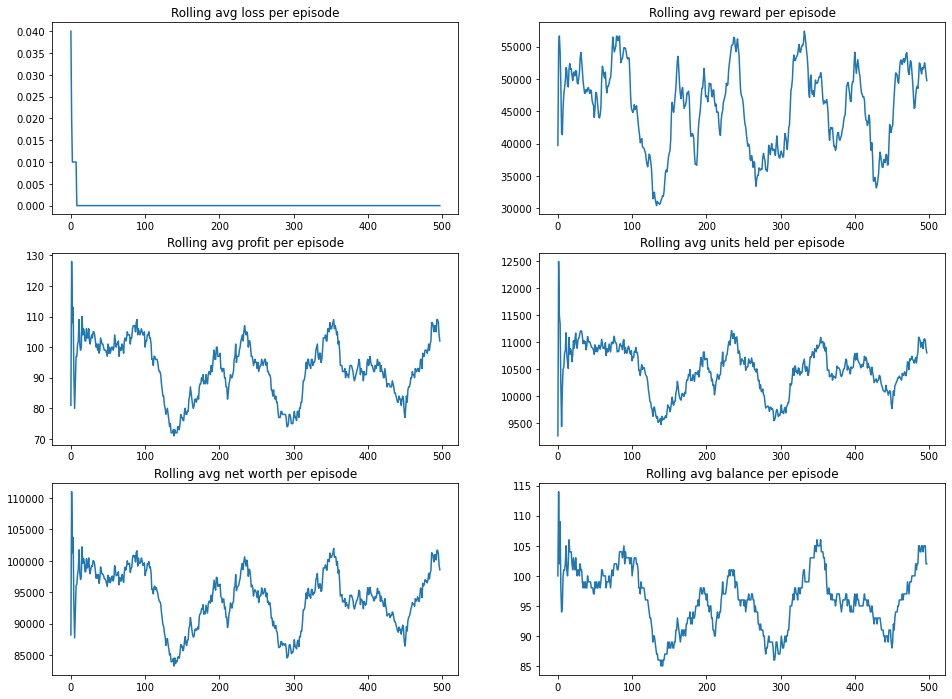

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')